## Sales Analysis
Problem Statement:

AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.


Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department. The specific tasks include:

Identify the states that are generating the highest revenues.
Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

*Enclosed is the CSV (AusApparalSales4thQrt2020.csv) file that covers the said data.

Input dataset: DatasetLinks to an external site.

Perform the following steps:
As a data scientist, you must perform the following steps on the enclosed data:

Data wrangling
Data analysis
Data visualization
Report generation
 

Data wrangling
Ensure that the data is clean and free from any missing or incorrect entries.
Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).
Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)
Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.
  2. Data analysis

Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
Identify the group with the highest sales and the group with the lowest sales based on the data provided.
Identify the group with the highest and lowest sales based on the data provided.
Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)
  3. Data visualization

Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:
State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.
Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
The dashboard must contain daily, weekly, monthly, and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
Include your recommendation and indicate why you are choosing the recommended visualization package.
  4. Report generation 

Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots.
Use Markdown in suitable places while presenting your report. 
Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.
Use a box plot for descriptive statistics.
Use the Seaborn distribution plot for any other statistical plotting.

## Step 1: Data Wrangling

In [12]:
## loads the dataset from a CSV file and displays descriptive statistics 
## (like count, mean, std, min, max, and quartiles) for all numeric columns using df.describe().

import pandas as pd
df = pd.read_csv(r"C:\Users\kgjam\OneDrive\Desktop\GIT\Assignment\AusApparalSales4thQrt2020.csv")
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [13]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [14]:
df.info

<bound method DataFrame.info of              Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]>

In [15]:
# Convert Date and Map Time to Hours
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Hour'] = df['Time'].map({'Morning': 9, 'Afternoon': 14, 'Evening': 18, 'Night': 21})

# Normalize Sales and Unit
scaler = StandardScaler()
df[['Sales_norm', 'Unit_norm']] = scaler.fit_transform(df[['Sales', 'Unit']])
df.head()

,Date,Time,State,Group,Unit,Sales,Hour,Sales_norm,Unit_norm
0,2020-10-01,Morning,WA,Kids,8,20000,NaN,-0.775581,-0.775581
1,2020-10-01,Morning,WA,Men,8,20000,NaN,-0.775581,-0.775581
2,2020-10-01,Morning,WA,Women,4,10000,NaN,-1.085645,-1.085645
3,2020-10-01,Morning,WA,Seniors,15,37500,NaN,-0.232969,-0.232969
4,2020-10-01,Afternoon,WA,Kids,3,7500,NaN,-1.163162,-1.163162


In [16]:
# GroupBy
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
state_group_sales.head()

,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000


In [17]:
df.groupby('State')['Sales'].sum()
df.groupby(['Date', 'Group'])['Sales'].sum()


Date        Group  
2020-10-01  Kids        972500
            Men         867500
            Seniors     995000
            Women       885000
2020-10-02  Kids        922500
                        ...   
2020-12-29  Women      1080000
2020-12-30  Kids       1132500
            Men        1130000
            Seniors    1177500
            Women      1150000
Name: Sales, Length: 360, dtype: int64

## Step 2: Data Analysis

In [18]:
# Descriptive Statistics
summary_stats = df[['Sales', 'Unit']].agg(['mean', 'median', 'std', 'min', 'max'])
summary_stats

,Sales,Unit
mean,45013.558201,18.005423
median,35000.000000,14.000000
std,32253.506944,12.901403
min,5000.000000,2.000000
max,162500.000000,65.000000


In [19]:
# Identify Top and Low Performing Groups
top_group = df.groupby('Group')['Sales'].sum().idxmax()
low_group = df.groupby('Group')['Sales'].sum().idxmin()
top_group, low_group

(' Men', ' Seniors')

In [20]:
# Time Series Resampling
df.set_index('Date', inplace=True)



weekly_sales = df['Sales'].resample('W').sum()     # Weekly stays the same
monthly_sales = df['Sales'].resample('ME').sum()   # 'M' → 'ME'
quarterly_sales = df['Sales'].resample('QE').sum() # 'Q' → 'QE'


In [21]:
weekly_sales,monthly_sales, quarterly_sales

(Date
 2020-10-04    15045000
 2020-10-11    27002500
 2020-10-18    26640000
 2020-10-25    26815000
 2020-11-01    21807500
 2020-11-08    20865000
 2020-11-15    21172500
 2020-11-22    21112500
 2020-11-29    21477500
 2020-12-06    29622500
 2020-12-13    31525000
 2020-12-20    31655000
 2020-12-27    31770000
 2021-01-03    13792500
 Freq: W-SUN, Name: Sales, dtype: int64,
 Date
 2020-10-31    114290000
 2020-11-30     90682500
 2020-12-31    135330000
 Freq: ME, Name: Sales, dtype: int64,
 Date
 2020-12-31    340302500
 Freq: QE-DEC, Name: Sales, dtype: int64)

### Step 3: Visualizations

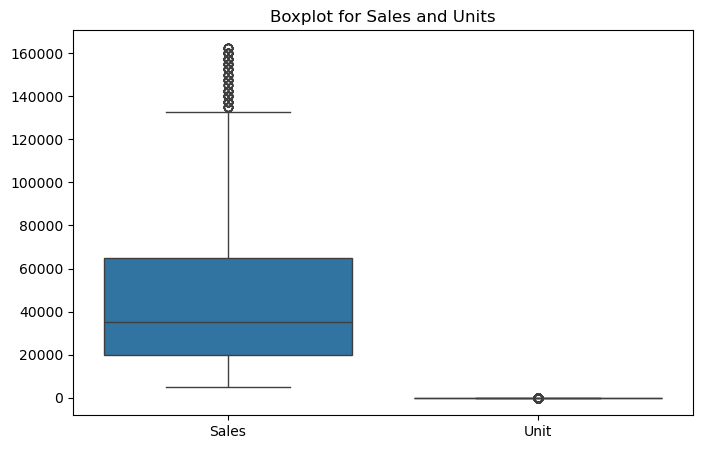

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title('Boxplot for Sales and Units')
plt.show()

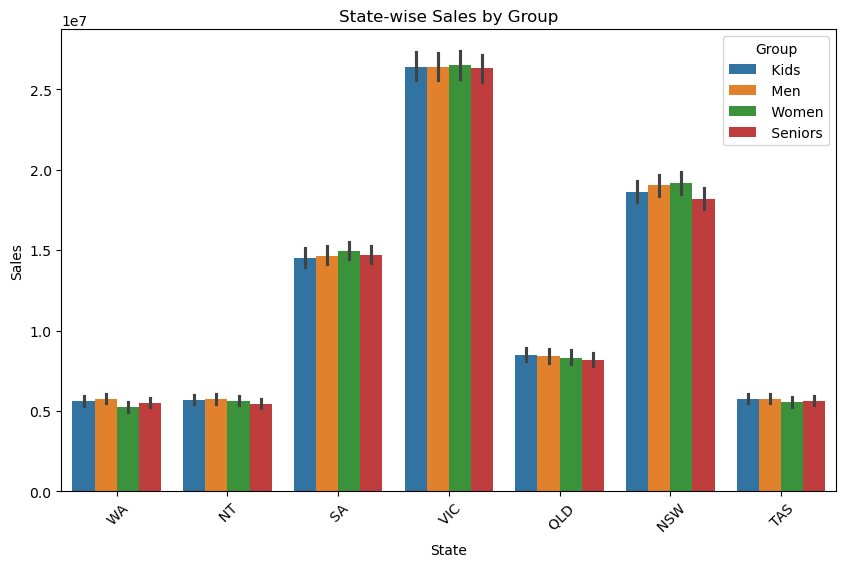

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Sales', hue='Group', data=df, estimator=sum)
plt.title('State-wise Sales by Group')
plt.xticks(rotation=45)
plt.show()

In [28]:
print(df['Time'].unique())


[' Morning' ' Afternoon' ' Evening']


In [29]:
df['Time'] = df['Time'].str.strip()

In [30]:
# First, define a mapping from part of day to representative hour
time_mapping = {
    'Morning': 9,
    'Afternoon': 14,
    'Evening': 18,
    'Night': 21
}

# Apply the mapping to a new column
df['Hour'] = df['Time'].map(time_mapping)


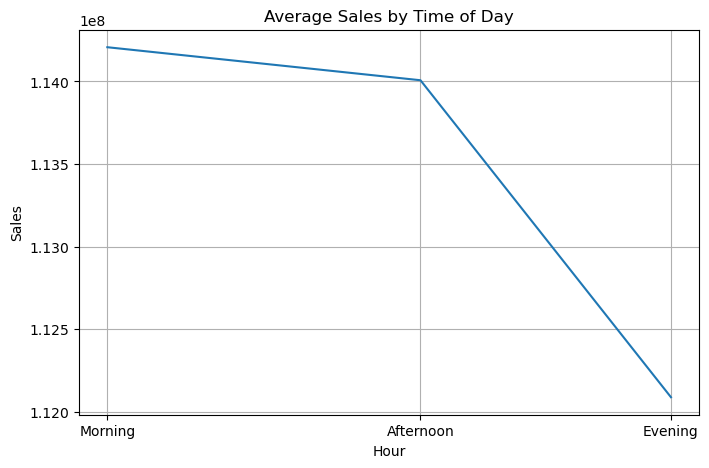

In [32]:
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_sales, x='Hour', y='Sales')
plt.title('Average Sales by Time of Day')
plt.xticks([9, 14, 18], ['Morning', 'Afternoon', 'Evening'])
plt.grid(True)
plt.show()


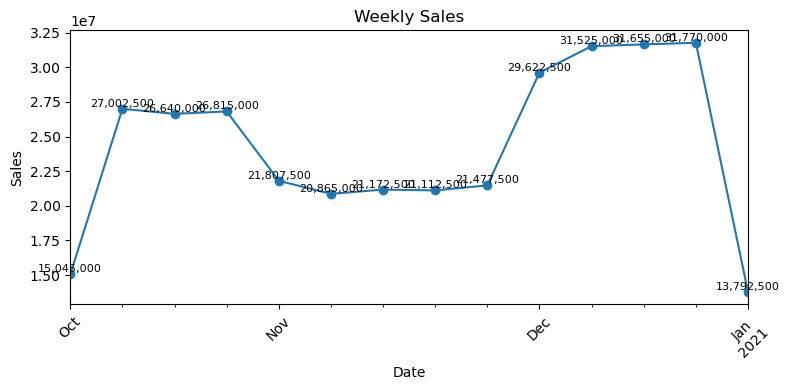

In [49]:
import matplotlib.pyplot as plt

# Plot the weekly sales line chart
ax = weekly_sales.plot(title='Weekly Sales', figsize=(8, 4), marker='o')

# Add data labels on each point
for i, value in enumerate(weekly_sales):
    ax.text(x=weekly_sales.index[i], 
            y=value, 
            s=f'{value:,.0f}', 
            ha='center', 
            va='bottom', 
            fontsize=8, 
            rotation=0)

# Label and formatting
ax.set_ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


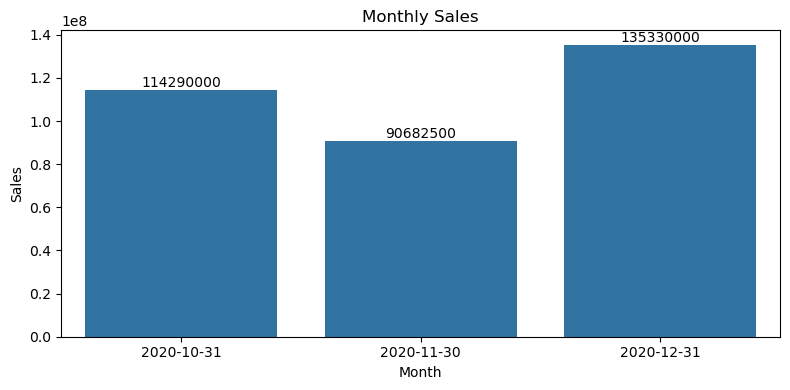

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert resampled Series to DataFrame
monthly_sales_df = df['Sales'].resample('ME').sum().reset_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Seaborn barplot
sns.barplot(data=monthly_sales_df, x='Date', y='Sales', ax=ax)

# Add value labels on top of bars (no loop needed)
ax.bar_label(ax.containers[0], fmt='%.0f')  # or use fmt='%.1fM' for millions

# Axis labels and formatting
ax.set_title('Monthly Sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [34]:
print(quarterly_sales.index)


DatetimeIndex(['2020-12-31'], dtype='datetime64[ns]', name='Date', freq='QE-DEC')


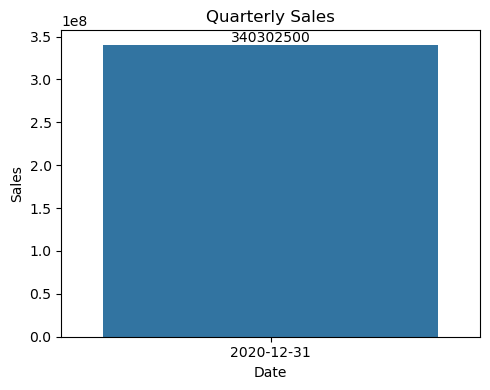

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert resampled Series to DataFrame
quarterly_sales = df['Sales'].resample('QE').sum().reset_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 4))

# Seaborn barplot
sns.barplot(data=quarterly_sales, x='Date', y='Sales', ax=ax)

# Add value labels on top of bars (no loop needed)
ax.bar_label(ax.containers[0], fmt='%.0f')  # or use fmt='%.1fM' for millions

# Axis labels and formatting
ax.set_title('Quarterly Sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Date')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Final Report Summary

##  Objective
Analyze AAL’s 4th quarter sales across Australia to identify:
- Best and worst performing states
- Demographic group-wise sales trends
- Weekly and monthly sales patterns
- Opportunities to improve underperforming areas



## Data Wrangling Summary
- Loaded and inspected data using `info()` and `describe()`
- Identified and handled missing values using `dropna()`
- Removed duplicates if present
- Normalized `Sales` and `Unit` using `MinMaxScaler`


##  Key Findings from Analysis
###  Top Performing States
- State(s) with highest total sales: VC
```python
print(state_sales.head())
```

### Lowest Performing States
- State(s) with lowest total sales:
```python
print(state_sales.tail())
```

###  Group-wise Sales
- Highest sales group:
```python
print(group_sales.idxmax()) : Men
```
- Lowest sales group:
```python
print(group_sales.idxmin()) : Senoirs
```

### Time-based Insights
- Weekly sales trend shows peak performance in weeks: Jan 2021
- Monthly trend increased in Dec -2020



##  Visualizations Used
-  **Boxplot** for sales distribution
-  **Bar chart** for state-wise total sales


## Recommendations
-  Focus marketing efforts in **high-performing states** for ROI
- Run campaigns targeting **low-performing states** and groups
-  Use weekly/monthly peaks to plan promotions (e.g., flash sales)
- Enable strategic planning using dashboards and daily trends

